In [1]:
import suncal
import numpy as np
import sympy

# Stefan-Boltzmann Constant
## Example 10 from NIST Uncertainty Machine Manual

Reference: https://www.nist.gov/publications/uncertainty-machine-users-manual

In this example, the function is defined as a sympy expression instead of a string.


In [2]:
# Using sympy to build the expression. Note use of latex-style notations for subscripts
# and greek letters (alpha) converting to symbols
h, R, Rinf, Are, Mu, c, alpha = sympy.symbols('h R, R_inf A_r M_u c, alpha')
num = 32 * sympy.pi**5 * h * R**4 * Rinf**4
denom = 15 * Are**4 * Mu**4 * c**6 * alpha**8
sigma = num/denom
display(sigma)

32*pi**5*R**4*R_inf**4*h/(15*A_r**4*M_u**4*alpha**8*c**6)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$\sigma$   | GUM          | 5.670372e-08 W/K⁴/m²  | 2.0e-13 W/K⁴/m²           | ± 4.0e-13 W/K⁴/m²     | 1.960     | inf           |
|$\sigma$   | Monte Carlo  | 5.670372e-08 W/K⁴/m²  | 2.0e-13 W/K⁴/m²           | (5.670332e-08 W/K⁴/m², 5.670413e-08 W/K⁴/m²) | 1.960     | -             |

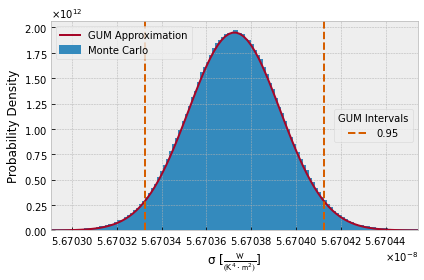

In [3]:
u = suncal.UncertCalc()
u.set_function(sigma, name='sigma', outunits='W m^-2 K^-4')

# Mu and c have 0 uncertainty. Just add their nominal values
u.set_input('M_u', nom=1E-3, units='kg/mol')
u.set_input('c', nom=299792458, units='m/s')

# Remaining inputs use values from Table 4
u.set_input('h', nom=6.62606957E-34, uname='u(h)', std=.00000029E-34, units='J s')
u.set_input('R', nom=8.3144621, uname='u(R)', std=.0000075, units='J/mol/K')
u.set_input('R_inf', nom=10973731.568539, uname='u(Rinf)', std=.000055, units='m^-1')
u.set_input('A_r', nom=5.4857990946E-4, uname='u(A_r)', std=.0000000022E-4, units='1')  # This is *relative* atomic mass, unitless
u.set_input('alpha', nom=7.2973525698e-3, uname='u(alpha)', std=.0000000024E-3, units='1')

# And calculate.
display(u.calculate())
u.out.plot_pdf(intervalsgum=[.95]);

In [4]:
u.out.report_inputs()

|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description  |
|----------|---------|------------------|--------------|-------------|
|$A_{r}$   | 0.0005485799095  | 2.2e-13            | inf       |              |
|$M_{u}$   | 0.0010  | 0.0 kg/mol           | inf       |              |
|$R$   | 8.3144621  | 7.5e-06 J/K/mol           | inf       |              |
|$R_{inf}$   | 1.097373157e+07  | 0.000055 1/m          | inf      |              |
|$\alpha$   | 0.007297352570 | 2.4e-12           | inf      |              |
|$c$   | 2.997924580e+08 | 0.0 m/s          | inf      |              |
|$h$   | 6.62606957e-34 | 2.9e-41 J·s          | inf      |              |

In [5]:
u.out.report_expanded()

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$\sigma$   | 99.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 2.576     | inf            | 5.3e-13 W/K⁴/m²              |
|-          | 95.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 1.960     | inf            | 4.0e-13 W/K⁴/m²              |
|-          | 90.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 1.645     | inf            | 3.4e-13 W/K⁴/m²              |
|-          | 68.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m² | 0.994     | inf            | 2.0e-13 W/K⁴/m²             |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$\sigma$   | 99.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 2.573    |
|-          | 95.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 1.960    |
|-          | 90.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 1.645    |
|-          | 68.00%     | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 0.994    |